# FLIGHT PRICE PREDICTION(HACKATHON)##AUTHOR-NIKHIL MUGGANAWAR

In [ ]:
ASSUMPTIONS FOR PREDICTION MODEL TO BE BUILT
##No dimensionality reduction in forms of PCA carried out but Recursive feature elimination has been carried out -
##Owing to business acumen that all the predictor variables given in dataset are important corelation between variables and VIF are not considered
##Final model is a predictive model 
##Above could be better understood when gone through the below process and predictors involved

In [1]:
import os
print(os.getcwd())

C:\Users\admin


In [2]:
##IMPORT PANDAS,NUMPY AND MATPLOTLIB LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
##READ TRAINING DATA
train=pd.read_excel('Data_Train.xlsx',encoding = "ANSI")
train=train.dropna(axis='rows')

In [4]:
##READ TEST DATA
test=pd.read_excel('Test_set.xlsx',encoding = "ANSI")
test=test.dropna(axis='rows')

# DATA VISUALIZATION

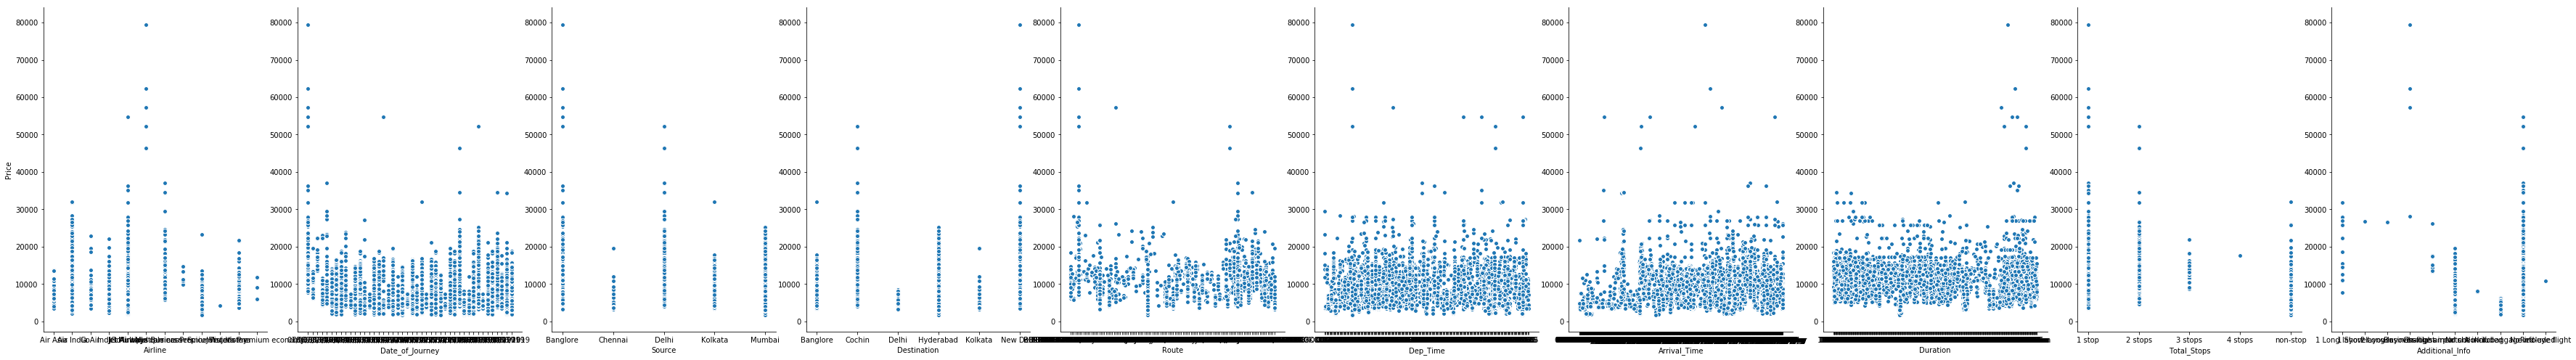

In [5]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(train, x_vars=['Airline','Date_of_Journey','Source','Destination','Route','Dep_Time','Arrival_Time','Duration','Total_Stops','Additional_Info'], y_vars='Price',size=7, aspect=0.7, kind='scatter')

# DATA PREPROCESSING

In [6]:
##CHECK FOR NULL VALUES IN TRAIN DATA
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
##CHECK FOR NULL VALUES IN TEST DATA
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [8]:
##REMOVE NULL VALUES FROM TRAIN AND TEST DATA AS NUMBER OF NULL VALUES IS NOT THAT SIGNIFICANT
train = train[pd.notnull(train)]
test = test[pd.notnull(test)]

In [9]:
##CHECK FOR NULL VALUES IN TRAIN DATA AGAIN
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
##CHECK FOR NULL VALUES IN TRAIN DATA AGAIN
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [11]:
##rename columns to single case i.e lower case for both training and test data
train=train.rename(columns={'Airline':'airline','Date_of_Journey':'dateofjourney','Source':'source','Destination':'destination','Route':'route','Dep_Time':'deptime','Arrival_Time':'arrivaltime','Duration':'duration','Total_Stops':'totalstops','Additional_Info':'additionalinfo','Price':'price'})
test=test.rename(columns={'Airline':'airline','Date_of_Journey':'dateofjourney','Source':'source','Destination':'destination','Route':'route','Dep_Time':'deptime','Arrival_Time':'arrivaltime','Duration':'duration','Total_Stops':'totalstops','Additional_Info':'additionalinfo'})

In [12]:
#convert airline column to string data typ
train['airline']=train['airline'].values.astype(str)
test['airline']=test['airline'].values.astype(str)

In [13]:
#split dateofjourney to day and month of journey
train['dayofjourney']=train.dateofjourney.apply(lambda x: x.split('/')[0])
train['monthofjourney']=train.dateofjourney.apply(lambda x: x.split('/')[1])
test['dayofjourney']=test.dateofjourney.apply(lambda x: x.split('/')[0])
test['monthofjourney']=test.dateofjourney.apply(lambda x: x.split('/')[1])

In [14]:
#convert duration to minutes
train['durationminutes']=train['duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test['durationminutes']=test['duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
#convert totalstops column to appropriate categories
train['totalstops']=train.totalstops.map({'non-stop':'0','1 stop':'1','2 stops':'2','3 stops':'3','4 stops':'4'})
test['totalstops']=test.totalstops.map({'non-stop':'0','1 stop':'1','2 stops':'2','3 stops':'3','4 stops':'4'})

In [15]:
#drop route column as we consider source and destination to be predictors which are subset of route
train=train.drop(['route'],axis=1)
test=test.drop(['route'],axis=1)

In [16]:
#convert airline,additionalinfo,source and destination to one hot encoding columns
#train_df=pd.get_dummies(train['airline'],prefix='airline_',drop_first=True)
#train_df1=pd.get_dummies(train['additionalinfo'],prefix='additionalinfo_',drop_first=True)
train_df2=pd.get_dummies(train['source'],prefix='source_',drop_first=True)
train_df3=pd.get_dummies(train['destination'],prefix='destination_',drop_first=True)
#test_df=pd.get_dummies(test['airline'],prefix='airline_',drop_first=True)
#test_df1=pd.get_dummies(test['additionalinfo'],prefix='additionalinfo_',drop_first=True)
test_df2=pd.get_dummies(test['source'],prefix='source_',drop_first=True)
test_df3=pd.get_dummies(test['destination'],prefix='destination_',drop_first=True)

In [17]:
#concat data frames with encoded columns and drop the original categorical columns 'dateofjourney','airline','duration','additionalinfo','source','destination'
#train=pd.concat([train,train_df],axis=1)
train_new=pd.concat([train,train_df2,train_df3],axis=1)
train_new=train_new.drop(['dateofjourney','airline','duration','additionalinfo','source','destination'],axis=1)
#test=pd.concat([test,test_df],axis=1)
test_new=pd.concat([test,test_df2,test_df3],axis=1)
test_new=test_new.drop(['dateofjourney','airline','duration','additionalinfo','source','destination'],axis=1)


In [18]:
#split deptime ,arrival time into departure and arrival hours and drop original columns
train_new['departurehour']=train_new.deptime.apply(lambda x: x.split(':')[0])
train_new['arrivalhour']=train_new.arrivaltime.apply(lambda x: x.split(':')[0])
train_new=train_new.drop(['deptime','arrivaltime'],axis=1)
test_new['departurehour']=test_new.deptime.apply(lambda x: x.split(':')[0])
test_new['arrivalhour']=test_new.arrivaltime.apply(lambda x: x.split(':')[0])
test_new=test_new.drop(['deptime','arrivaltime'],axis=1)

In [19]:
train_new['departurehour']=train_new.departurehour.map({'00':'0','01':'1','02':'2','03':'3','04':'4','05':'5','06':'6','07':'7','08':'8','09':'9','10':'10','11':'11','12':'12','13':'13','14':'14','15':'15','16':'16','17':'17','18':'18','19':'19','20':'20','21':'21','22':'22','23':'23'})
train_new['arrivalhour']=train_new.arrivalhour.map({'00':'0','01':'1','02':'2','03':'3','04':'4','05':'5','06':'6','07':'7','08':'8','09':'9','10':'10','11':'11','12':'12','13':'13','14':'14','15':'15','16':'16','17':'17','18':'18','19':'19','20':'20','21':'21','22':'22','23':'23'})

In [20]:
test_new.departurehour.value_counts()

09    236
07    200
06    176
08    175
20    175
17    152
05    147
19    143
10    141
11    134
21    133
16    132
14    124
15    112
18    109
22     99
13     94
12     54
04     49
02     34
23     28
00     11
01      7
03      6
Name: departurehour, dtype: int64

In [21]:
test_new['departurehour']=test_new.departurehour.map({'00':'0','01':'1','02':'2','03':'3','04':'4','05':'5','06':'6','07':'7','08':'8','09':'9','10':'10','11':'11','12':'12','13':'13','14':'14','15':'15','16':'16','17':'17','18':'18','19':'19','20':'20','21':'21','22':'22','23':'23'})
test_new['arrivalhour']=test_new.arrivalhour.map({'00':'0','01':'1','02':'2','03':'3','04':'4','05':'5','06':'6','07':'7','08':'8','09':'9','10':'10','11':'11','12':'12','13':'13','14':'14','15':'15','16':'16','17':'17','18':'18','19':'19','20':'20','21':'21','22':'22','23':'23'})

In [22]:
train_new.departurehour.value_counts()

9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: departurehour, dtype: int64

In [23]:
test_new.departurehour.value_counts()

9     236
7     200
6     176
8     175
20    175
17    152
5     147
19    143
10    141
11    134
21    133
16    132
14    124
15    112
18    109
22     99
13     94
12     54
4      49
2      34
23     28
0      11
1       7
3       6
Name: departurehour, dtype: int64

In [24]:
train_new['departurehour']=train_new['departurehour'].astype(np.int64)
train_new['arrivalhour']=train_new['arrivalhour'].astype(np.int64)
test_new['departurehour']=test_new['departurehour'].astype(np.int64)
test_new['arrivalhour']=test_new['arrivalhour'].astype(np.int64)

In [25]:
#bin departure and ariival hours
labels=['earlymorning','morning','afternoon','evening','night']
bins=[0,5,10,14,19,23]
train_new['departuredayduration'] = pd.cut(train_new['departurehour'], [0,5,10,14,19,23],labels=[0,1,2,3,4],include_lowest=False)
train_new['arrivaldayduration'] = pd.cut(train_new['arrivalhour'], [0,5,10,14,19,23],labels=[0,1,2,3,4],include_lowest=False)
test_new['departuredayduration'] = pd.cut(test_new['departurehour'], [0,5,10,14,19,23],labels=[0,1,2,3,4],include_lowest=False)
test_new['arrivaldayduration'] = pd.cut(test_new['arrivalhour'], [0,5,10,14,19,23],labels=[0,1,2,3,4],include_lowest=False)

In [26]:
print (train_new.departuredayduration.value_counts())

1    3702
3    2497
2    1698
4    1691
0    1054
Name: departuredayduration, dtype: int64


In [27]:
print (test_new.departuredayduration.value_counts())

1    928
3    648
4    435
2    406
0    243
Name: departuredayduration, dtype: int64


In [28]:
#convert departuredayduration and arrivaldayduration to one hot encodding
train_df4=pd.get_dummies(train_new['departuredayduration'],prefix='departuredayduration_',drop_first=False)
train_df5=pd.get_dummies(train_new['arrivaldayduration'],prefix='arrivaldayduration_',drop_first=False)
train_new=pd.concat([train_new,train_df4,train_df5],axis=1)
train_new=train_new.drop(['departuredayduration','arrivaldayduration'],axis=1)
train_new=train_new.rename(columns={'departuredayduration__0':'earlymorningdeparture','depparturedayduration__1':'morningdeparture','departuredayduration__2':'afternoondeparture','departuredayduration__3':'eveningdeparture','departuredayduration__4':'nightdeparture'})
train_new=train_new.rename(columns={'arrivaldayduration__0':'earlymorningarrival','arrivaldayduration__1':'morningarrival','arrivaldayduration__2':'afternoonarrival','arrivaldayduration__3':'eveningarrival','arrivaldayduration__4':'nightarrival'})

In [29]:
#convert departuredayduration and arrivaldayduration to one hot encodding
test_df4=pd.get_dummies(test_new['departuredayduration'],prefix='departuredayduration_',drop_first=False)
test_df5=pd.get_dummies(test_new['arrivaldayduration'],prefix='arrivaldayduration_',drop_first=False)
test_new=pd.concat([test_new,test_df4,test_df5],axis=1)
test_new=test_new.drop(['departuredayduration','arrivaldayduration'],axis=1)
test_new=test_new.rename(columns={'departuredayduration__0':'earlymorningdeparture','depparturedayduration__1':'morningdeparture','departuredayduration__2':'afternoondeparture','departuredayduration__3':'eveningdeparture','departuredayduration__4':'nightdeparture'})
test_new=test_new.rename(columns={'arrivaldayduration__0':'earlymorningarrival','arrivaldayduration__1':'morningarrival','arrivaldayduration__2':'afternoonarrival','arrivaldayduration__3':'eveningarrival','arrivaldayduration__4':'nightarrival'})

In [30]:
train_Y=train_new['price']
train_new=train_new.drop(['price'],axis=1)
train_new=train_new.dropna()
train_Y=train_Y.dropna()

In [31]:
test_new.head()

,totalstops,dayofjourney,monthofjourney,durationminutes,source__Chennai,source__Delhi,source__Kolkata,source__Mumbai,destination__Cochin,destination__Delhi,...,earlymorningdeparture,departuredayduration__1,afternoondeparture,eveningdeparture,nightdeparture,earlymorningarrival,morningarrival,afternoonarrival,eveningarrival,nightarrival
0,1,6,06,655,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,1,12,05,240,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,21,05,1425,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1,21,05,780,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,24,06,170,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0


In [32]:
#create dataframe to store price predictions for test data
test_price= pd.DataFrame(index=range(2671),columns=['Price'])
test_price =test_price.fillna(0) # with 0s rather than NaNs
test_price=test_price.values
test_price=np.ravel(test_price)
print(train_new.shape)
#print(test_price)

(10682, 25)


# MODEL BUILDING

In [33]:
#mulitple linear regression model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#lr.fit(train_new,train_Y)
rfe = RFE(lr, 25)             # running RFE
rfe = rfe.fit(train_new, train_Y)

In [34]:
col = train_new.columns[rfe.support_]
col

Index(['totalstops', 'dayofjourney', 'monthofjourney', 'durationminutes',
       'source__Chennai', 'source__Delhi', 'source__Kolkata', 'source__Mumbai',
       'destination__Cochin', 'destination__Delhi', 'destination__Hyderabad',
       'destination__Kolkata', 'destination__New Delhi', 'departurehour',
       'arrivalhour', 'earlymorningdeparture', 'departuredayduration__1',
       'afternoondeparture', 'eveningdeparture', 'nightdeparture',
       'earlymorningarrival', 'morningarrival', 'afternoonarrival',
       'eveningarrival', 'nightarrival'],
      dtype='object')

In [35]:
train_new_rfe=train_new[col]
train_new_rfe.head()

,totalstops,dayofjourney,monthofjourney,durationminutes,source__Chennai,source__Delhi,source__Kolkata,source__Mumbai,destination__Cochin,destination__Delhi,...,earlymorningdeparture,departuredayduration__1,afternoondeparture,eveningdeparture,nightdeparture,earlymorningarrival,morningarrival,afternoonarrival,eveningarrival,nightarrival
0,0,24,03,170,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,2,1,05,445,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,2,9,06,1140,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,1,12,05,325,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,01,03,285,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [36]:
lr.fit(train_new_rfe,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print(train_new_rfe.shape)

(10682, 25)


In [38]:
# Making predictions on training data set
y_pred_train = lr.predict(train_new_rfe)
print(type(y_pred_train))
y_pred_train=y_pred_train.round(decimals=0)
y_pred_train=y_pred_train.astype(np.int64)
print(y_pred_train)

<class 'numpy.ndarray'>
[ 8908 12470 13971 ...  4044 10173 13585]


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(train_Y, y_pred_train)
r_squared = r2_score(train_Y, y_pred_train)
print('Mean_Squared_Error for Training data for linear regression model :' ,mse)
print('r_square_value for training data for linear regression model:',r_squared)

Mean_Squared_Error for Training data for linear regression model : 11568991.232259877
r_square_value for training data for linear regression model: 0.45594534430302025


In [40]:
print(test_new.columns)

Index(['totalstops', 'dayofjourney', 'monthofjourney', 'durationminutes',
       'source__Chennai', 'source__Delhi', 'source__Kolkata', 'source__Mumbai',
       'destination__Cochin', 'destination__Delhi', 'destination__Hyderabad',
       'destination__Kolkata', 'destination__New Delhi', 'departurehour',
       'arrivalhour', 'earlymorningdeparture', 'departuredayduration__1',
       'afternoondeparture', 'eveningdeparture', 'nightdeparture',
       'earlymorningarrival', 'morningarrival', 'afternoonarrival',
       'eveningarrival', 'nightarrival'],
      dtype='object')


In [41]:
# Making predictions on test data set
test_new=test_new[col]
test_price = lr.predict(test_new)
print(type(test_price))
test_price=test_price.round(decimals=0)
test_price=test_price.astype(np.int64)
print(test_price)

<class 'numpy.ndarray'>
[10784  8846 10667 ... 11633 11113  9429]


In [42]:
#building vanilla decsion tree regressor to evaluate possibility of better accuracy than multiple linear regression on training data
from sklearn.tree import DecisionTreeRegressor 
regressor=DecisionTreeRegressor(random_state = 0)
regressor.fit(train_new_rfe,train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [43]:
pred=regressor.predict(train_new_rfe)
print(r2_score(y_true=train_Y, y_pred=pred))

0.9507135954250393


In [44]:
pred_test=regressor.predict(test_new)
pred_test=pred_test.astype(np.int64)
print(pred_test)

[10262  4226 14488 ... 13843 13399  7155]


In [45]:
#building vanilla random forest regressor to evaluate possibility of better accuracy than multiple linear regression and Decision tree regressor on training data
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(train_new_rfe, train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
pred_ran=regr.predict(train_new_rfe)
print(r2_score(y_true=train_Y, y_pred=pred_ran))

0.45474987924277976


In [47]:
pred_ran_test=regr.predict(test_new)
pred_ran_test=pred_ran_test.astype(np.int64)
print(pred_ran_test)

[11024  5364 10970 ... 11356 11356 10970]


In [51]:
df = pd.DataFrame (pred_test)

In [55]:
filepath = 'FlightPricePrediction.xlsx'
df.to_excel(filepath, index=False)